In [5]:
### EDA RANDOM FOREST 
## Advance Project - 9: Classification using Random Forest on Company_Data.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
data=pd.read_csv("C:\\Users\\User\\Desktop\\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [11]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [13]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [19]:
data['HighSales'] = data['Sales'].apply(lambda x: 'High' if x >= 8 else 'Low')


In [23]:
print("\nSales to HighSales Distribution:")
print(data['HighSales'].value_counts())


Sales to HighSales Distribution:
HighSales
Low     236
High    164
Name: count, dtype: int64


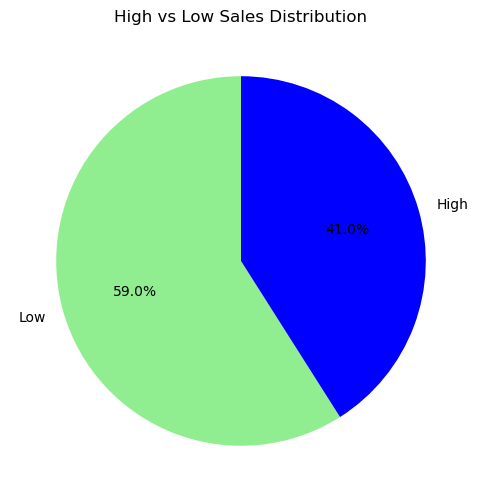

In [27]:
# Save pie chart
plt.figure(figsize=(6, 6))
data['HighSales'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["lightgreen", "blue"])
plt.title("High vs Low Sales Distribution")
plt.ylabel("")
plt.savefig("eda_graphs/highsales_pie_chart.png")
plt.show()

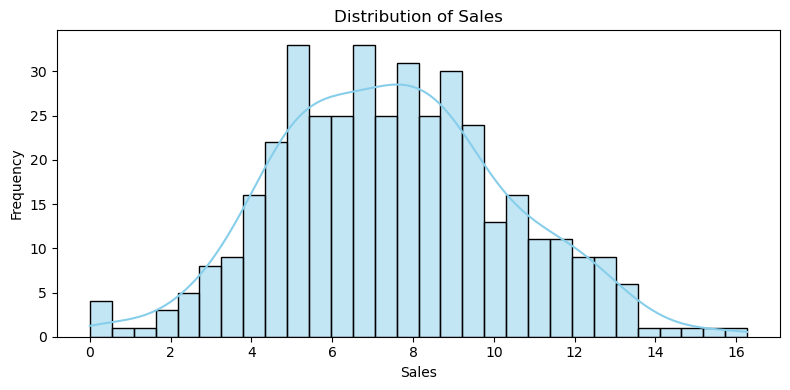

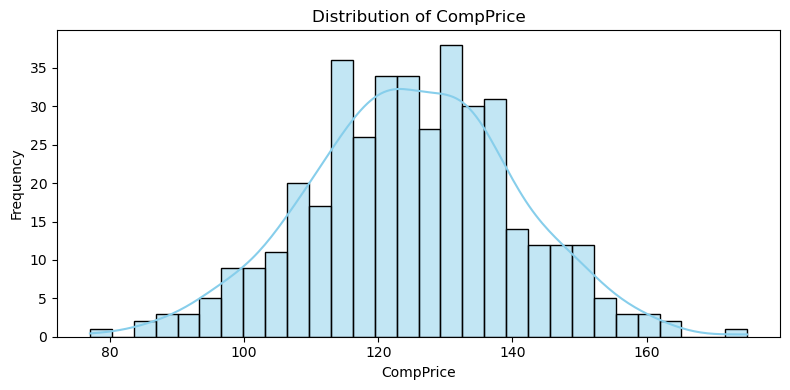

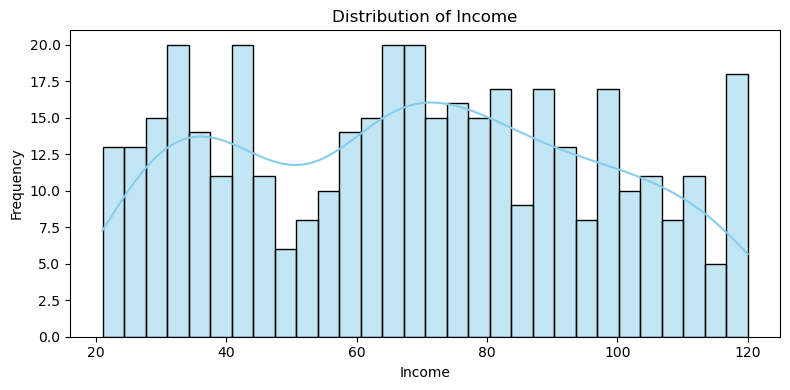

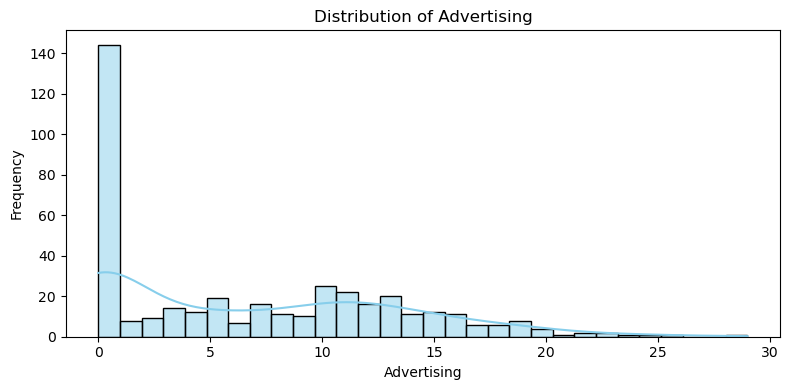

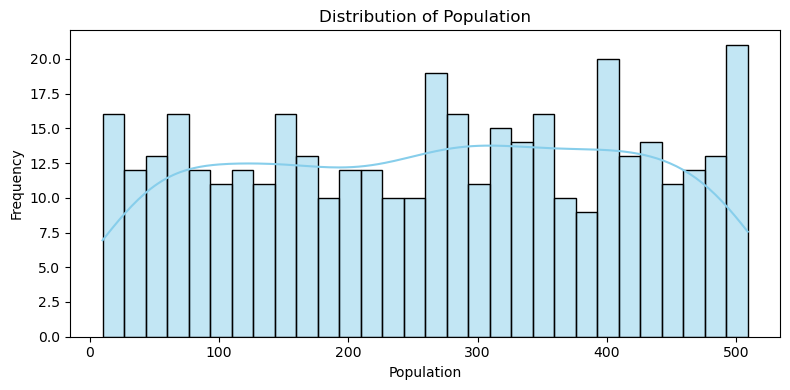

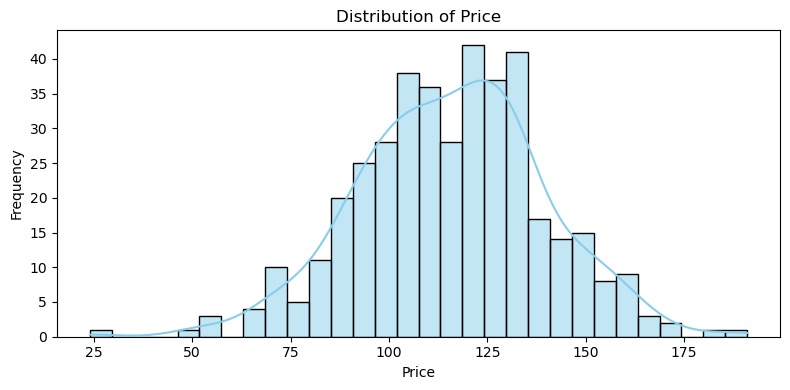

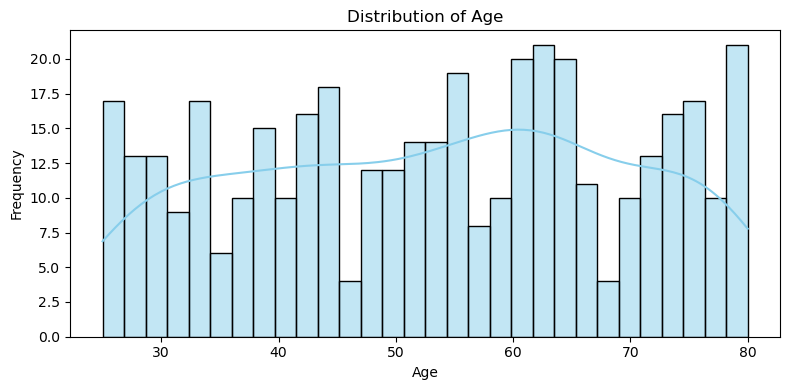

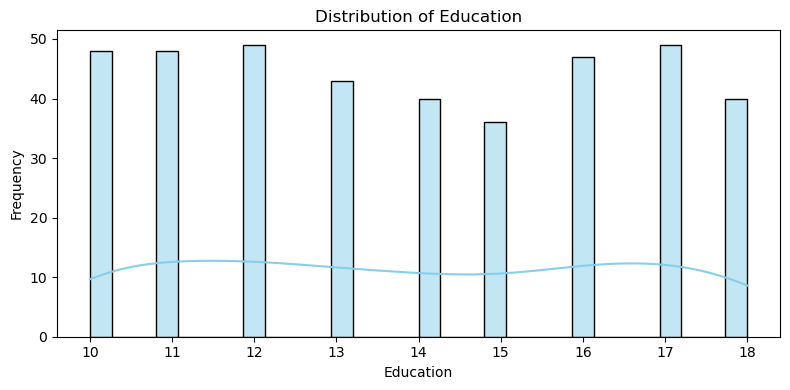

In [29]:
# Univariate Analysis – Numerical Features
# Numerical Columns
numerical_cols = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(f"eda_graphs/dist_{col}.png")
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8132\3552310696.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


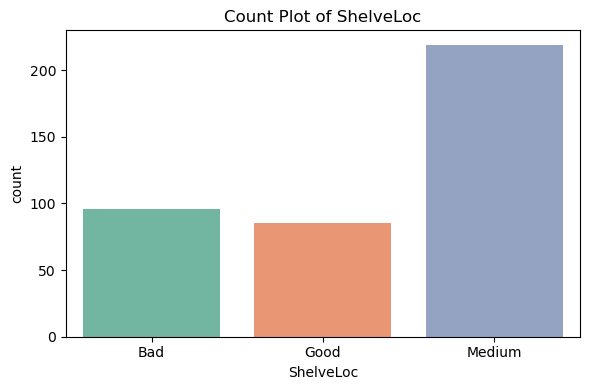

C:\Users\User\AppData\Local\Temp\ipykernel_8132\3552310696.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


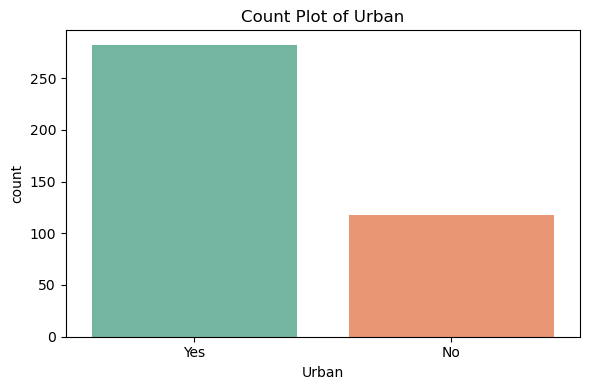

C:\Users\User\AppData\Local\Temp\ipykernel_8132\3552310696.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


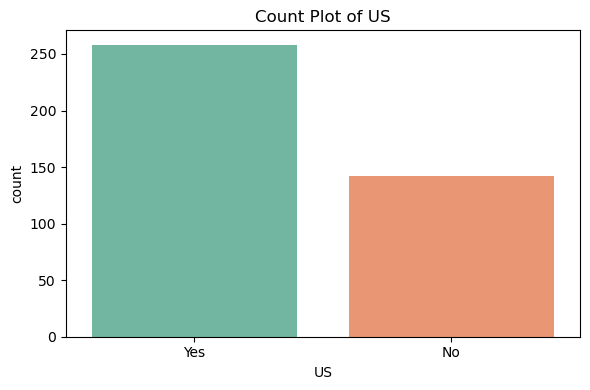

In [31]:
# Categorical Columns
categorical_cols = ['ShelveLoc', 'Urban', 'US']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, palette='Set2')
    plt.title(f"Count Plot of {col}")
    plt.tight_layout()
    plt.savefig(f"eda_graphs/count_{col}.png")
    plt.show()

In [ ]:
# Bivariate Analysis – Numerical Features vs HighSales
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='HighSales', y=col, data=data, palette='pastel')
    plt.title(f"{col} vs HighSales")
    plt.tight_layout()
    plt.savefig(f"eda_graphs/box_{col}_vs_highsales.png")
    plt.show()

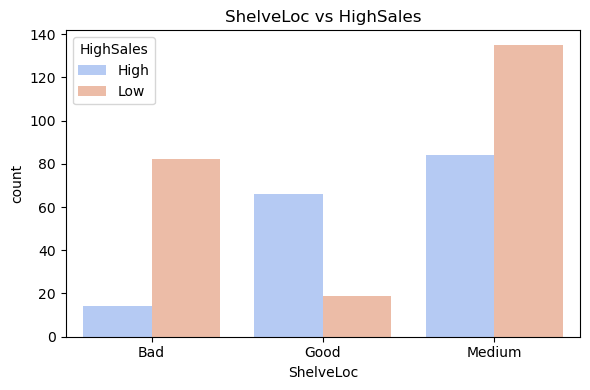

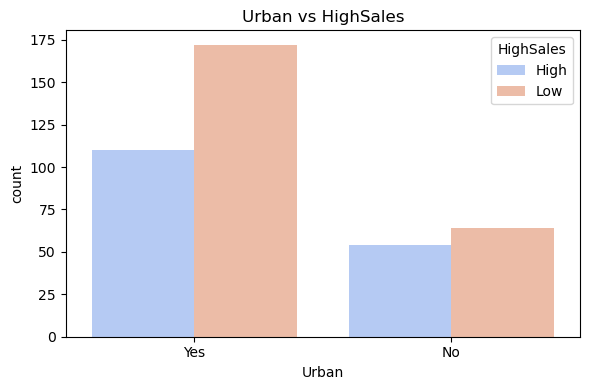

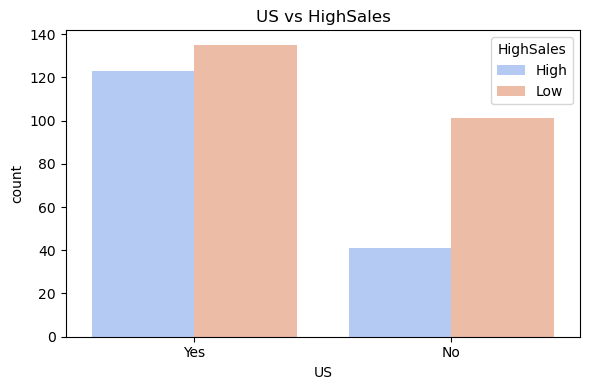

In [35]:
# Categorical Features vs HighSales
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, hue='HighSales', palette='coolwarm')
    plt.title(f"{col} vs HighSales")
    plt.tight_layout()
    plt.savefig(f"eda_graphs/{col}_vs_highsales.png")
    plt.show()

Dropping non-numeric columns for correlation: ['ShelveLoc', 'Urban', 'US']


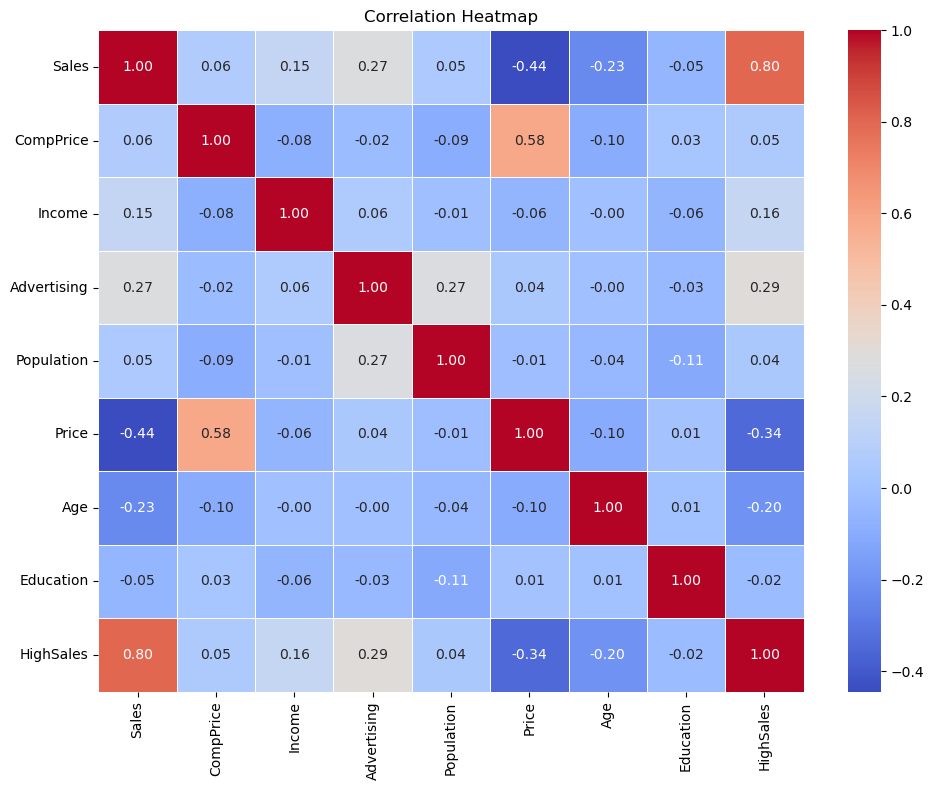

In [47]:
data_corr = data.copy()

# for Convert 'HighSales' to numeric
data_corr['HighSales'] = data_corr['HighSales'].map({'Low': 0, 'High': 1})

# for Drop non-numeric columns for correlation
non_numeric = data_corr.select_dtypes(include=['object']).columns
print("Dropping non-numeric columns for correlation:", list(non_numeric))

# For calculate correlation on numeric columns only
corr_matrix = data_corr.drop(columns=non_numeric).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("eda_graphs/correlation_heatmap.png")
plt.show()
